### 1. if the season of empareamiento has something to do with the same time of the shark attacks.

### Is there some reason why the sharks go closer to the shores in some specific season or reason or .....

### Is there an specific time that sharks likes to go close to the shore?

### where does the most fatal accidents occure

# 1. Hypotesis ganadora: 
## Does sharks attack more because they are horny? 
### Que necesito de informacion para esta hypotesis?????

#### datos de la tabla para  limpiar    
    1. Necesito los tiempos, las fechas en que ocurrio el ataque 
    2. La especie de sharks.
    3. el estado del ataque, si fue fatal o no (posiblemente mientras mas fuerte el ataque, mas caliente)

#### Tipo de analisis
    1. relacionar el tipo de especie con las fechas del ataque - a ver si hay una corelacion, similitudes de mismas especies con el tiempo del ataque
    2.relacionar si coinciden tambien los ataques mas mortales con las fechas del ataque.

#### Investigar por fuera:
    1. cuales son las temporadas de mating de los difierentes tipos de sharks pueestos en el df
    2. podemos investigar si hay alguna relacion del clima que prefieren los tiburones para el tiempo de apareamiento.
    3. investigar junto con el DF el clima de los lugares al momento del ataque.

como limpiar las celdas cuando no son ... 

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file = "D:\\ironhack\\proyectos\\SharkAttack_proy1\DATA\\clean_attack.csv"
shark_clean = pd.read_csv(csv_file, encoding='utf8')

In [3]:
shark_clean

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
0,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,Jun,whiteshark
1,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Jun,NaN
2,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Jun,NaN
3,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,Jun,NaN
4,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Jun,tigershark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,NaN
6298,6298,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,NaN
6299,6299,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,NaN
6300,6300,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,NaN


In [64]:
csv_file = "D:\\ironhack\\proyectos\\SharkAttack_proy1\DATA\\clean_attack2.csv"
shark_cleanned = pd.read_csv(csv_file, encoding='utf8')

In [65]:
shark_cleanned.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
4755,4755,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",Slipped off rocks and fell into the water,boy,M,6,"FATAL, both arms bitten",Y,NaN,NaN,NaN


Detecting information co related between the attacks of each species during specific time.

For a better comprenhantion I would create a new column matching each month of the year with their order number, that way I could sort it in future time.

will create a copy of my data frame to dont lose any information and will apply a dropna.

In [66]:
shark_cleanned_2 = shark_cleanned.copy()

In [67]:
shark_cleanned_2.dropna(inplace=True)

In [68]:
months = {"Jan":1, "Feb":2, "Mar":3, "Oct":10, "Sep":9, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Nov":11, "Dec":12, np.nan: np.nan}

In [69]:
shark_cleanned_2["new"] = shark_cleanned_2["Months"].apply(lambda x: months[x])

In [117]:
shark_cleanned_2.sample(3)

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
232,232,2016.0,Unprovoked,USA,Hawaii,Maui,SUP Foil boarding,Connor Baxter,M,21,"No inury, shark & board collided",N,16h30,Aug,tigershark,8
622,622,2013.0,Unprovoked,USA,Florida,"Casino Beach, Pensacola, Escambia County",Swimming,Trevor Kalck,M,21,Lacerations to right foot,N,15h30,Sep,bullshark,9
278,278,2016.0,Provoked,USA,Florida,"Boca Raton, Palm Beach County",Teasing a shark,female,F,23,Arm grabbed PROVOKED INCIDENT,N,13h20,May,nurseshark,5


sort the values with the new column 

In [87]:
shark_cleanned_2.sort_values(by=["new"], inplace = True)

In [89]:
Comparation = pd.crosstab(shark_cleanned_2["Species"], shark_cleanned_2["Months"])
Comparation

Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Species,,,,,,,,,,,,
blacktipshark,0,1,0,1,2,1,2,1,3,1,5,1
blueshark,0,2,0,0,0,3,1,1,0,0,0,0
bullshark,8,7,5,3,6,3,11,2,6,2,1,6
galapagosshark,0,0,0,1,0,0,0,0,1,1,0,0
nurseshark,0,0,0,0,0,2,2,1,2,0,0,1
porbeagleshark,0,0,0,0,0,0,0,0,0,0,1,0
reefshark,1,0,0,1,0,1,0,0,0,0,0,0
spinnershark,0,1,0,1,0,0,0,2,0,0,2,1
tigershark,12,4,7,3,6,2,3,7,5,9,10,6


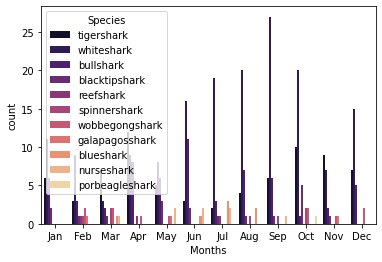

In [90]:
sns.countplot(x=shark_cleanned_2["Months"], hue=shark_cleanned_2["Species"], palette="magma");

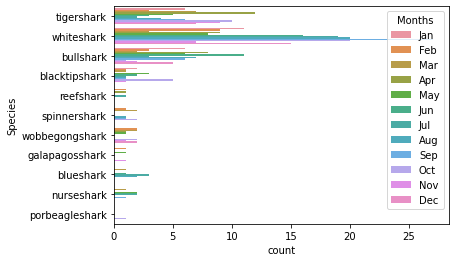

In [91]:
sns.countplot(y=shark_cleanned_2.Species, hue=shark_cleanned_2.Months);

In [92]:
shark_cleanned_2.Species.value_counts()

whiteshark        164
tigershark         74
bullshark          60
blacktipshark      18
wobbegongshark     11
nurseshark          8
spinnershark        7
blueshark           7
reefshark           3
galapagosshark      3
porbeagleshark      1
Name: Species, dtype: int64

In [82]:
shark_cleanned_2[(shark_cleanned_2.Species=="whiteshark")]

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
0,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,Jun,whiteshark
22,22,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Nathan Burch,M,NaN,"No injury, shark struck his leg",N,Afternoon,Apr,whiteshark
24,24,2018.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,male,M,33,"No injury, shark bit hole in ski",N,09h40,Apr,whiteshark
34,34,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,Apr,whiteshark
40,40,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,Anna Shurapey,F,55,Laceratons to right leg & foot,N,"19h00, Dusk",NaN,whiteshark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,6007,1853.0,Unprovoked,USA,North Carolina,"Morehead, Carteret County",Commercial Salvage Diving,Alfetto,M,NaN,No injury. Copper breastplate & harness bitten,N,NaN,NaN,whiteshark
6011,6011,1853.0,Unprovoked,USA,North Carolina,"Morehead, Carteret County",Hard hat diving,Mark Dare,M,NaN,"No injury, copper breastplate punctured",N,NaN,NaN,whiteshark
6162,6162,1700.0,Unprovoked,FRANCE,Côte d'Azur,Antibes,Bathing,seaman,M,NaN,Leg severed,N,NaN,NaN,whiteshark
6244,6244,0.0,Unprovoked,BAHAMAS,Andros Islands,NaN,NaN,"male, a sponge Diver",M,NaN,Lower leg and forearm severed,N,NaN,NaN,whiteshark


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

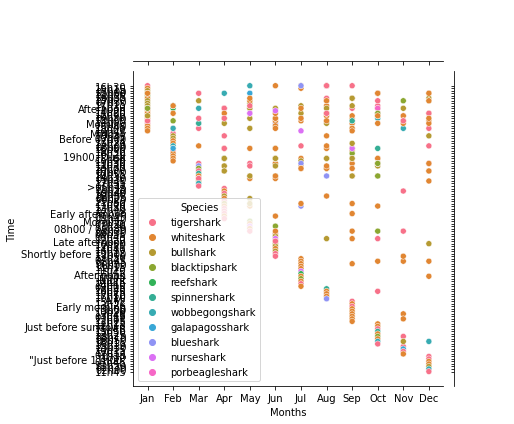

In [118]:
sns.jointplot(data=shark_cleanned_2, x= "Months", y= "Time", hue="Species");

<AxesSubplot: xlabel='Months', ylabel='Count'>

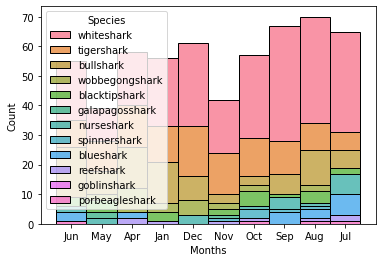

In [113]:
sns.histplot(data=shark_clean, x= "Months", hue="Species", multiple="stack")

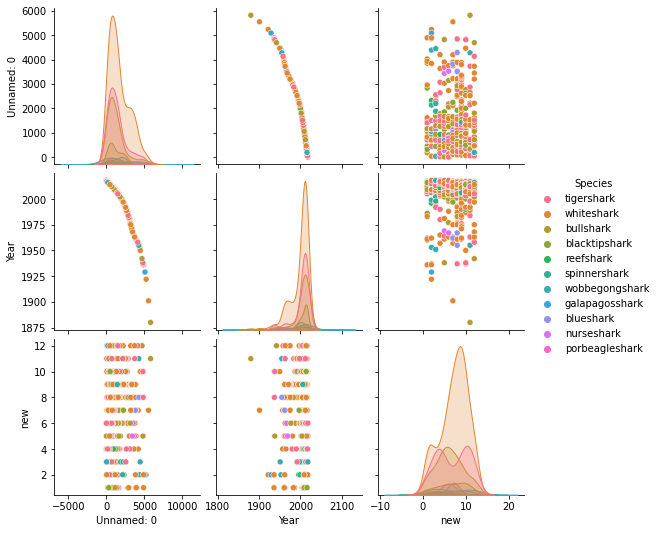

In [115]:
sns.pairplot(shark_cleanned_2, hue="Species");

In [ ]:
sns.jointplot(data=sharken, x= "body_mass_g", y= "flipper_length_mm", hue="species")

### White shark

In [93]:
white = shark_cleanned_2[(shark_cleanned_2.Species=="whiteshark") & (shark_cleanned_2.Months)]


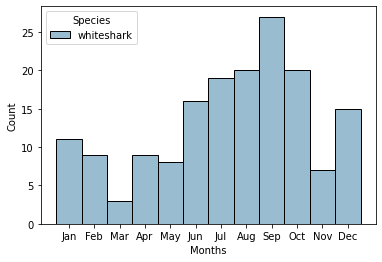

In [94]:
sns.histplot(palette="mako", x=white.Months, hue=white.Species);

In [95]:
shark_clean["Months"].value_counts()

Jul    587
Aug    548
Sep    490
Jan    462
Jun    438
Apr    408
Oct    401
Dec    389
Nov    370
May    358
Name: Months, dtype: int64

### Tiger sharks

In [97]:
tiger = shark_cleanned_2[(shark_cleanned_2.Species=="tigershark") & (shark_cleanned_2.Months)]
tiger.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
1166,1166,2009.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. John's",Swimming,Sikhanyiso Bangilizwe,M,25,FATAL,Y,14h00,Jan,tigershark,1


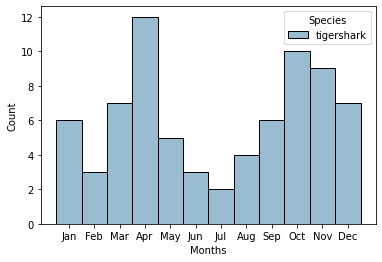

In [98]:
sns.histplot(palette="mako", x = tiger.Months, hue = tiger.Species);

### Bull sharks

In [99]:
bull = shark_cleanned_2[(shark_cleanned_2.Species=="bullshark") & (shark_cleanned_2.Months)]
bull.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
186,186,2017.0,Unprovoked,INDONESIA,Bali,Balian Beach,Surfing,Daniel Moore,M,48,Injury to right wrist & forearm,N,07h30,Jan,bullshark,1


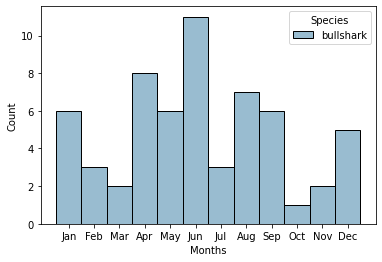

In [100]:
sns.histplot(palette="mako", x = bull.Months, hue = bull.Species);

### Wobbegong shark

In [101]:
wobbe = shark_cleanned_2[(shark_cleanned_2.Species=="wobbegongshark") & (shark_cleanned_2.Months)]
wobbe.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
4387,4387,1953.0,Unprovoked,AUSTRALIA,New South Wales,Cave at Shell Harbour,Spearfishing,Rex Gallagher,M,25,"Shark tore off face mask, diver’s face, nose &...",N,18h00,Feb,wobbegongshark,2


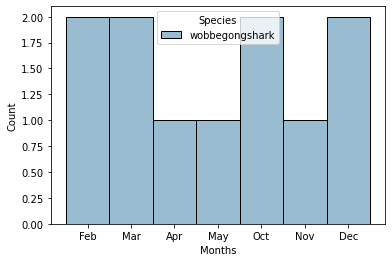

In [102]:
sns.histplot(palette="mako", x = wobbe.Months, hue = wobbe.Species);

### blacktip shark      


In [103]:
black = shark_cleanned_2[(shark_cleanned_2.Species=="blacktipshark") & (shark_cleanned_2.Months)]
black.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
354,354,2015.0,Unprovoked,USA,Florida,"Vilano Beach, St. Johns County",Surfing,"David Morrison, Jr.",M,22,"Laceration to heel, puncture wounds to dorsum ...",N,16h20,Sep,blacktipshark,9


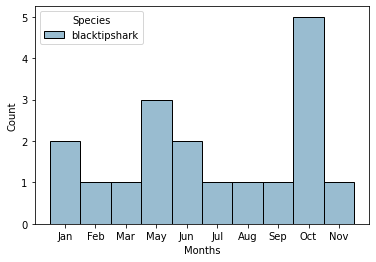

In [104]:
sns.histplot(palette="mako", x = black.Months, hue = black.Species);

### Nurse shark         


In [107]:
nurse = shark_cleanned_2[(shark_cleanned_2.Species=="nurseshark") & (shark_cleanned_2.Months)]
nurse.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
1332,1332,2007.0,Unprovoked,USA,Florida,"Lauderdale-by-the-Sea, Broward County",Snorkeling,Brandon Chapman,M,14,"Minor injury, shark latched onto his abdomen",N,16h00,Sep,nurseshark,9


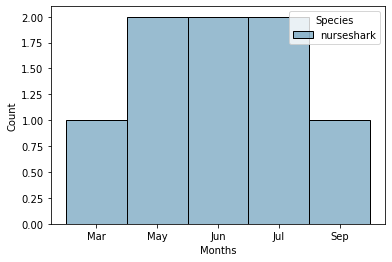

In [108]:
sns.histplot(palette="mako", x = nurse.Months, hue = nurse.Species);


### Blue shark          


In [109]:
blue = shark_cleanned_2[(shark_cleanned_2.Species=="blueshark") & (shark_cleanned_2.Months)]
blue.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
1151,1151,2009.0,Provoked,SOUTH AFRICA,Western Cape Province,Off Cape Point,Fishing,Gabriel Fernandez,M,40,Lacerations to arm and 2 fingers by hooked sha...,N,13h30,Mar,blueshark,3


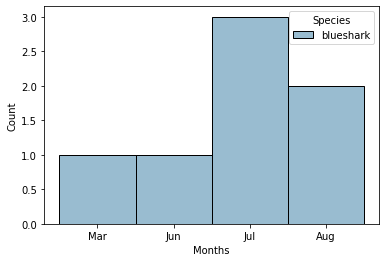

In [110]:
sns.histplot(palette="mako", x = blue.Months, hue = blue.Species);

### Spinner shark

In [111]:
spinner = shark_cleanned_2[(shark_cleanned_2.Species=="spinnershark") & (shark_cleanned_2.Months)]
spinner.sample()

,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,new
2199,2199,1998.0,Unprovoked,USA,Florida,"Loggerhead Park, Juno Beach, Palm Beach County",Swimming or paddle boarding,Rick Welch,M,32,6 puncture wounds to right calf,N,Morning,Mar,spinnershark,3


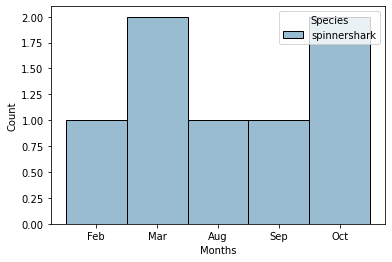

In [112]:
sns.histplot(palette="mako", x = spinner.Months, hue = spinner.Species);

### Generales 
Comparacion entre especies

In [ ]:
# Emtpy plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))

# For each plot, plot it somwhere
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=axs[1])
sns.histplot(palette="mako", x=pens.flipper_length_mm, hue=pens.species, ax=axs[2])